#**Actividad 4 Regresión Lineal Simple**
##Daniel Cruz Arciniega - A01701370

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/DF_Mexico.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [7]:
# Eliminar variables innecesarias
df = df[['host_acceptance_rate', 'host_response_rate',
        'price','number_of_reviews', 'review_scores_location',
        'review_scores_cleanliness', 'availability_365', 'reviews_per_month',
        'review_scores_communication','room_type']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         22181 non-null  object 
 1   host_response_rate           21133 non-null  object 
 2   price                        24224 non-null  object 
 3   number_of_reviews            24224 non-null  int64  
 4   review_scores_location       20571 non-null  float64
 5   review_scores_cleanliness    20573 non-null  float64
 6   availability_365             24224 non-null  int64  
 7   reviews_per_month            20628 non-null  float64
 8   review_scores_communication  20572 non-null  float64
 9   room_type                    24224 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.8+ MB


In [9]:
#Convertir strings a valores numéricos
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])

df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])

df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         22181 non-null  float64
 1   host_response_rate           21133 non-null  float64
 2   price                        24224 non-null  float64
 3   number_of_reviews            24224 non-null  int64  
 4   review_scores_location       20571 non-null  float64
 5   review_scores_cleanliness    20573 non-null  float64
 6   availability_365             24224 non-null  int64  
 7   reviews_per_month            20628 non-null  float64
 8   review_scores_communication  20572 non-null  float64
 9   room_type                    24224 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 1.8+ MB


<ipython-input-9-03addde3a578>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [10]:
df.isna().sum()

host_acceptance_rate           2043
host_response_rate             3091
price                             0
number_of_reviews                 0
review_scores_location         3653
review_scores_cleanliness      3651
availability_365                  0
reviews_per_month              3596
review_scores_communication    3652
room_type                         0
dtype: int64

In [11]:
# Llenar valores nulos con la mediana de los datos
df = df.fillna(df.median())
df.isna().sum()

<ipython-input-11-a953d425cd70>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


host_acceptance_rate           0
host_response_rate             0
price                          0
number_of_reviews              0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
room_type                      0
dtype: int64

In [12]:
# Manejar outliers utilizando el método del rango intercuartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-12-53575c63be14>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-12-53575c63be14>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-12-53575c63be14>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
hotel_room = df[df['room_type'] == 'Hotel room']
shared_room = df[df['room_type'] == 'Shared room']

In [21]:
def correlacion(df, var_i, var_d):
  # Analizar correlación
  correlation = df[var_i].corr(df[var_d])
  if correlacion:
    print(f'Correlación entre {var_i} y {var_d} = {correlation}')

  # Crear gráficos de dispersión
  sns.scatterplot(x=df[var_i], y=df[var_d])
  plt.title(f"Correlación: {var_i} vs {var_d}")
  plt.show()

In [22]:
def regresion(df, var_i, var_d):
  # Separar en X y y
  X = df[[var_i]]
  y = df[var_d]

  # Definir y entrenar el modelo
  model= LinearRegression()
  model.fit(X, y)

  # Predecir los datos de X
  y_pred = model.predict(X)

  # Graficar los resultados
  if 'Predicciones' in df:
    df.drop('Predicciones', axis=1, inplace=True)

  df.insert(0, 'Predicciones', y_pred)

  sns.scatterplot(x=var_i, y=var_d, color="blue", data=df)
  sns.scatterplot(x=var_i, y='Predicciones', color="red", data=df)
  sns.lineplot(x=var_i, y='Predicciones', color="red", data=df)
  plt.show()

  coef_d = model.score(X, y)
  print('Coef determinación', coef_d)

  coef_c = np.sqrt(coef_d)
  print('Coeficiente de correlación', coef_c)

In [23]:
hotel_cols = {
    'host_acceptance_rate': 'host_response_rate',
    'host_acceptance_rate': 'price',
    'host_acceptance_rate': 'number_of_reviews',
    'review_scores_location': 'review_scores_cleanliness',
    'availability_365': 'number_of_reviews',
    'reviews_per_month': 'review_scores_communication'
    }

room_cols = {
    'host_acceptance_rate': 'host_response_rate',
    'host_acceptance_rate': 'price',
    'host_acceptance_rate': 'number_of_reviews',
    'review_scores_location': 'review_scores_cleanliness',
    'availability_365': 'number_of_reviews',
    'reviews_per_month': 'review_scores_communication',
}

Correlación entre host_acceptance_rate y number_of_reviews = -0.12428379819076518


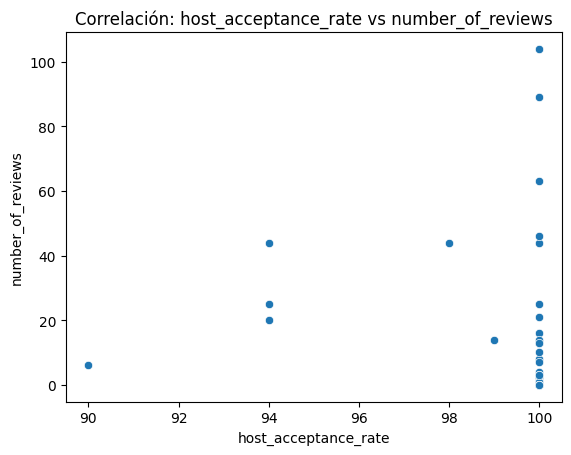

Correlación entre review_scores_location y review_scores_cleanliness = 0.6584198650446415


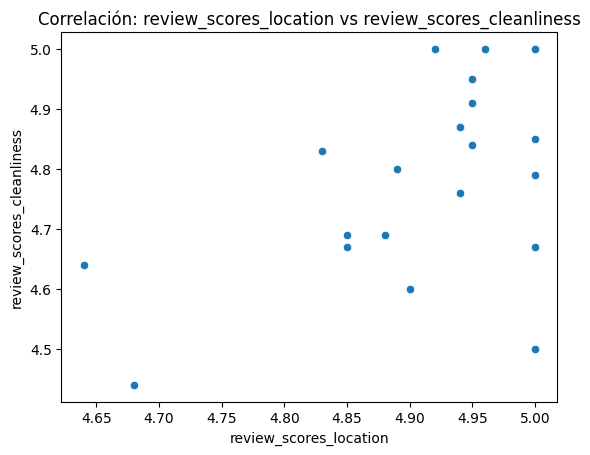

Correlación entre availability_365 y number_of_reviews = 0.10883383575845372


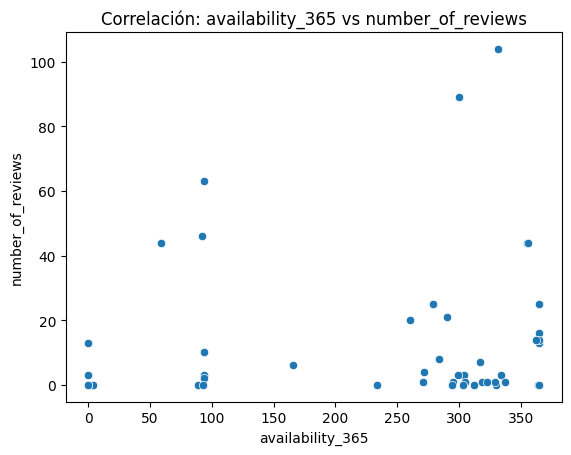

Correlación entre reviews_per_month y review_scores_communication = -0.26115153336912444


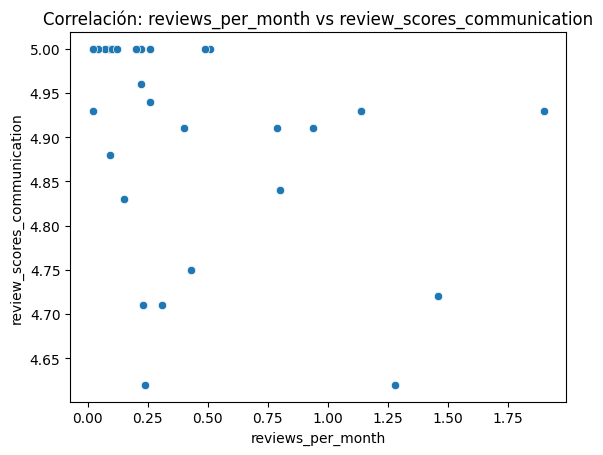

Correlación entre host_acceptance_rate y number_of_reviews = -0.1613070278615986


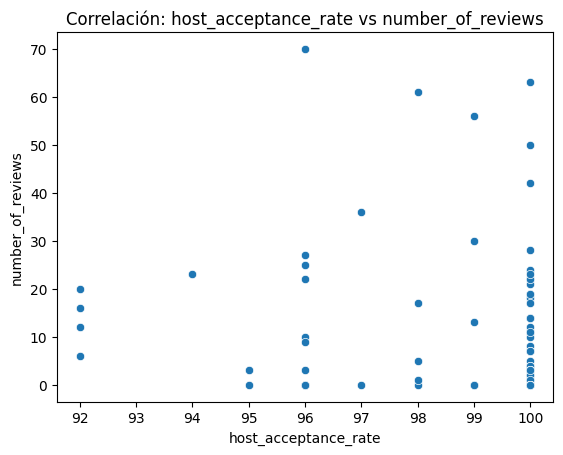

Correlación entre review_scores_location y review_scores_cleanliness = 0.1774239326887033


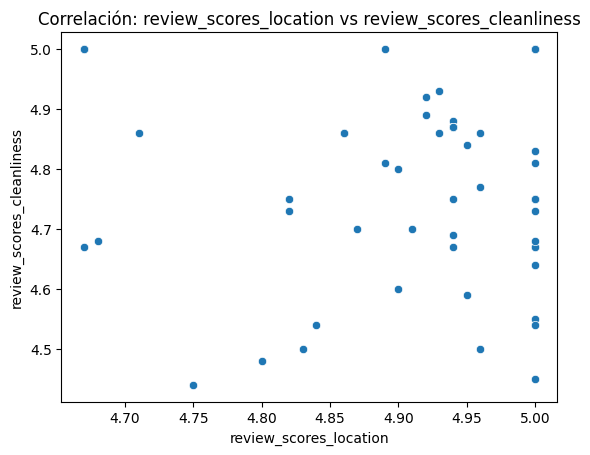

Correlación entre availability_365 y number_of_reviews = -0.037212931603987004


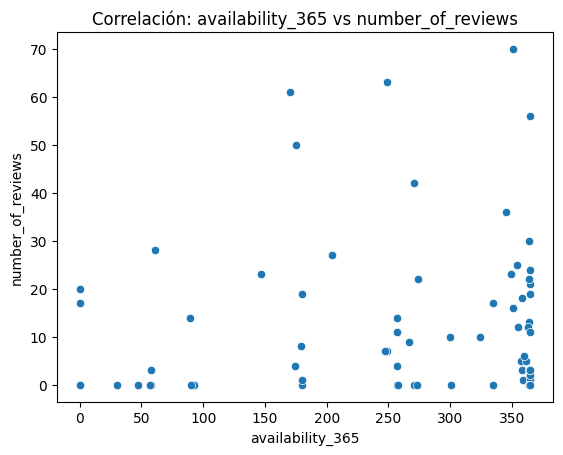

Correlación entre reviews_per_month y review_scores_communication = 0.04587251331254442


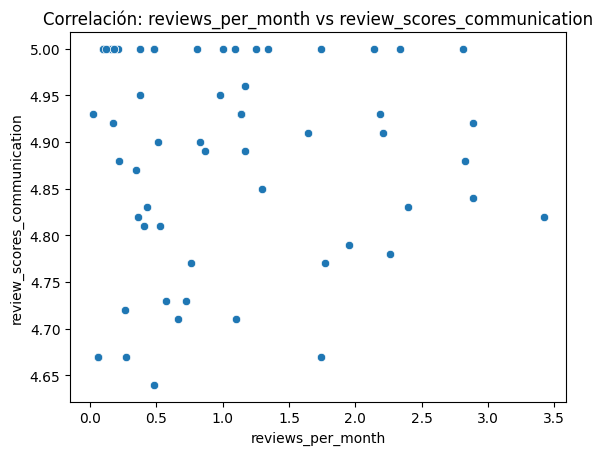

In [24]:
# Correlación
for i, d in hotel_cols.items():
  correlacion(hotel_room, i, d)

for i, d in room_cols.items():
  correlacion(shared_room, i, d)

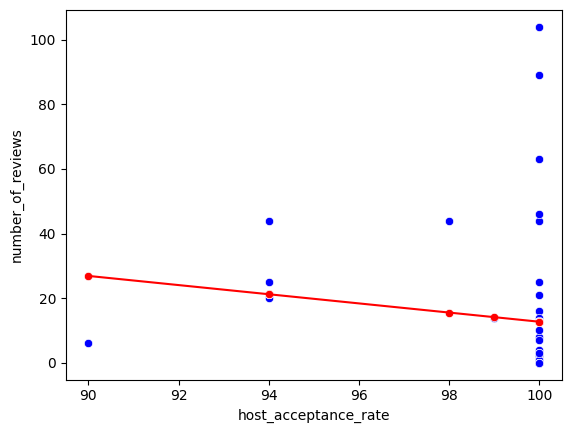

Coef determinación 0.015446462492722968
Coeficiente de correlación 0.12428379819076567


<ipython-input-22-f530a748969a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


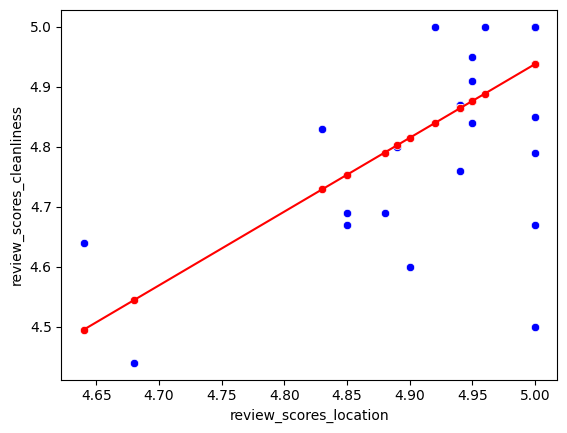

Coef determinación 0.43351671868540387
Coeficiente de correlación 0.6584198650446415


<ipython-input-22-f530a748969a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


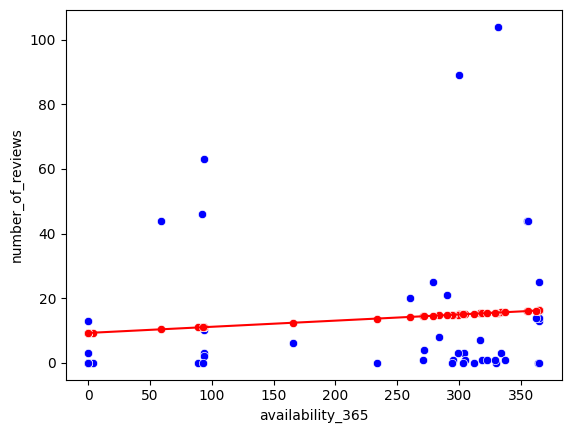

Coef determinación 0.01184480380589814
Coeficiente de correlación 0.108833835758454


<ipython-input-22-f530a748969a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


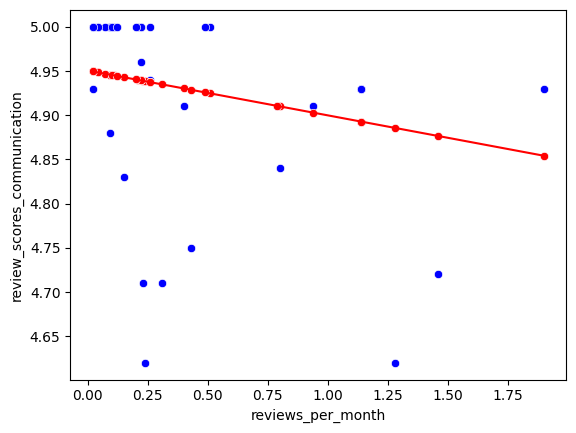

Coef determinación 0.06820012338104375
Coeficiente de correlación 0.2611515333691222


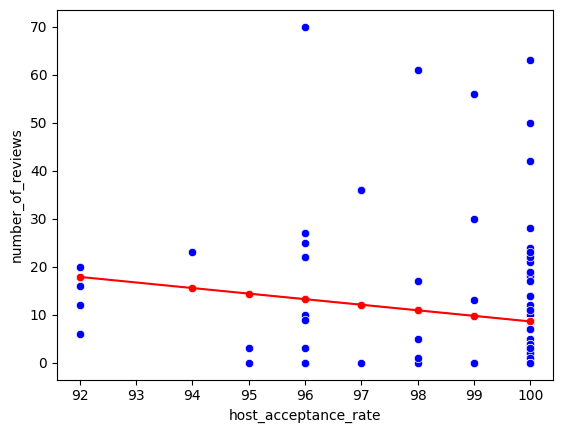

Coef determinación 0.026019957237542468
Coeficiente de correlación 0.16130702786159837


<ipython-input-22-f530a748969a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


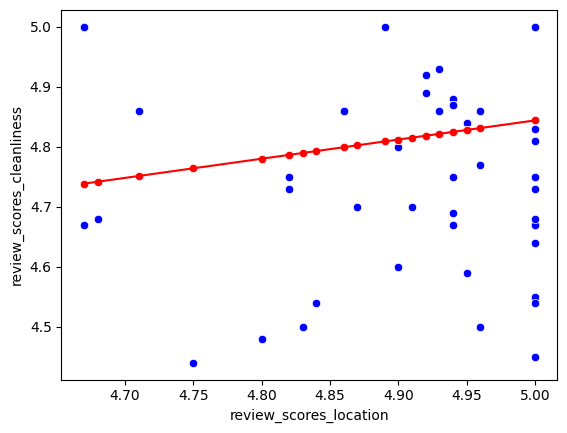

Coef determinación 0.031479251890724425
Coeficiente de correlación 0.17742393268870021


<ipython-input-22-f530a748969a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


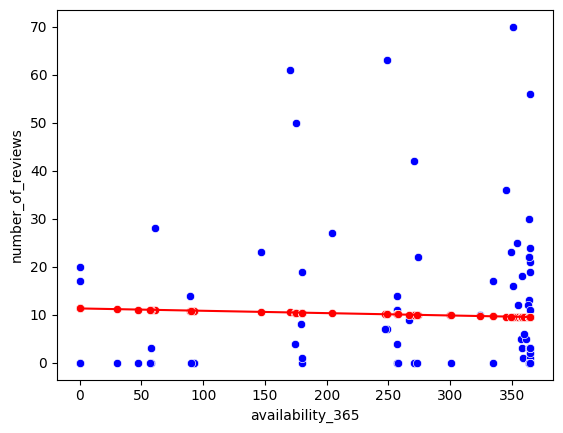

Coef determinación 0.0013848022785630798
Coeficiente de correlación 0.03721293160398788


<ipython-input-22-f530a748969a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


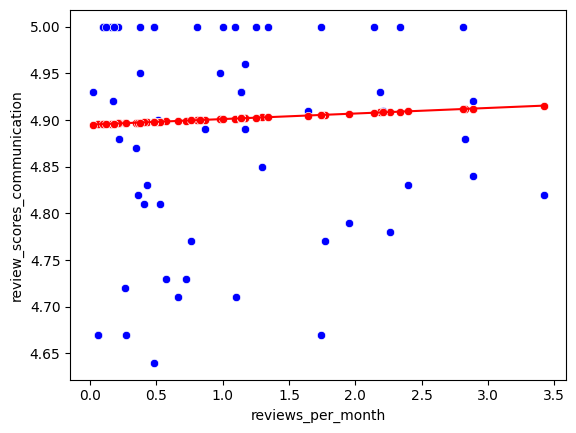

Coef determinación 0.002104287477608935
Coeficiente de correlación 0.04587251331253755


In [25]:
# Regresión lineal
for i, d in hotel_cols.items():
  regresion(hotel_room, i, d)

for i, d in room_cols.items():
  regresion(shared_room, i, d)